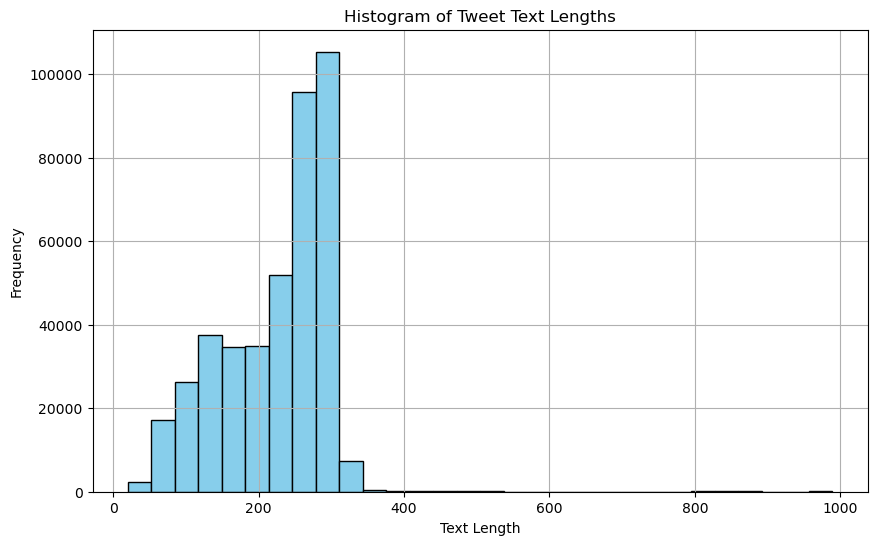

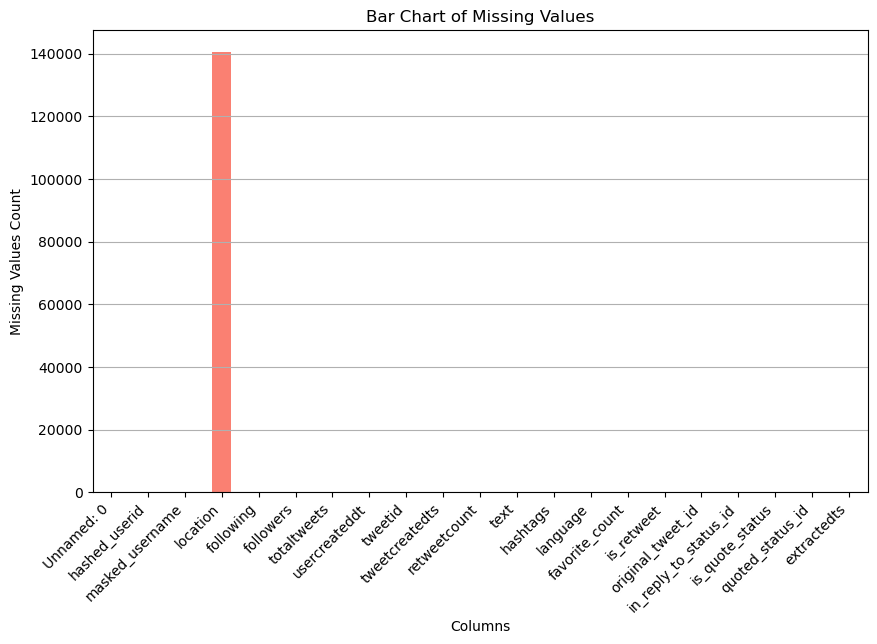

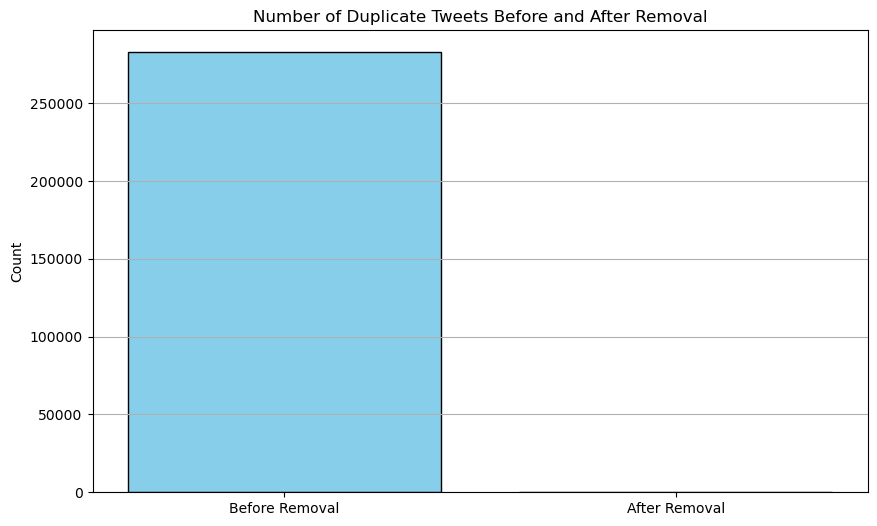

   Unnamed: 0         hashed_userid masked_username         location  \
0      415371  19868647935216335990       *****ecot              NaN   
1      415370  95273352056344375133       *****kh59  Terre Haute, IN   
2      415369  42256911176251501556  *******eDuster         Chi-town   
3      415368  98949018742144878760       *****ll42              NaN   
4      415367  83242079331442835051  *******tresist              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       1109        796       189199       9/16/09  1560823411047268352   
1        854        298        16999      10/10/17  1560823347583361024   
2        416       8852        11699       3/26/09  1560823151671488513   
3        603        179        59766       3/14/14  1560822898780213249   
4        257        758       272531       2/16/17  1560822761706094592   

  tweetcreatedts  ...                                           hashtags  \
0        57:54.0  ...  [{'text': 'MyBody

In [8]:
'''
TEST
This cell performs the following:
Loads the tweet data from a CSV file into a pandas DataFrame.
Defines a clean_text function to:
    Convert text to lowercase.
    Remove URLs, mentions, and hashtags.
    Remove extra spaces and punctuations.
Applies this function to clean the tweet texts.

'''

import pandas as pd
import numpy as np
import re

df = pd.read_csv('twitter_data.csv')

# Function to clean the tweet text
def clean_text(text):
    text = text.lower()  # convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+', '', text)  # remove mentions
    text = re.sub(r'\#\w+', '', text)  # remove hashtags
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces with a single space
    text = re.sub(r"^\s+|\s+$", "", text)  # remove spaces at the beginning and at the end of string
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuations
    return text


import matplotlib.pyplot as plt

# Histogram of Text Lengths
def plot_text_length_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['text'].str.len(), bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram of Tweet Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Bar Chart of Missing Values
def plot_missing_values_bar_chart(df):
    missing_values_count = df.isnull().sum()
    plt.figure(figsize=(10, 6))
    missing_values_count.plot(kind='bar', color='salmon')
    plt.title('Bar Chart of Missing Values')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the tweet data
plot_text_length_histogram(df)
plot_missing_values_bar_chart(df)


import matplotlib.pyplot as plt

# Visualize number of duplicate tweets before and after removal
def visualize_duplicate_tweets_before_after(df):
    # Count total number of duplicate tweets before removal
    total_duplicates_before = df.duplicated(subset=['text']).sum()

    # Remove duplicate tweets and count total number of duplicate tweets after removal
    df_cleaned = df.drop_duplicates(subset=['text'])
    total_duplicates_after = df_cleaned.duplicated(subset=['text']).sum()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(['Before Removal', 'After Removal'], [total_duplicates_before, total_duplicates_after], color=['skyblue', 'salmon'], edgecolor='black')
    plt.title('Number of Duplicate Tweets Before and After Removal')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the tweet data
visualize_duplicate_tweets_before_after(df)




# Clean the tweets
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove Duplicate tweets 
df.drop_duplicates(subset=['cleaned_text'], inplace=True) # To fix: Same ID as well & Retweet

# Drop rows with empty tweet text
df.dropna(subset=['cleaned_text'], inplace=True) # Drops rows with empty text in tweet coulmn


# Display the first few rows of the cleaned data
print(df.head())


In [6]:
'''
This cell will:
Tokenize the tweets: Break down the text into individual words (tokens).
Remove stopwords: Filter out common words like 'the', 'is', etc., that don't contribute much to sentiment.
Apply stemming: Reduce words to their root form.
'''

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization, Stopword Removal, and Stemming
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Optional: Stemming (you can also use Lemmatization based on your preference)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the tokens back into a string
    return ' '.join(stemmed_tokens)

# Apply the preprocessing to the cleaned text
df['preprocessed_text'] = df['cleaned_text'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bezawitayalew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bezawitayalew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Unnamed: 0         hashed_userid masked_username         location  \
0      415371  19868647935216335990       *****ecot              NaN   
1      415370  95273352056344375133       *****kh59  Terre Haute, IN   
2      415369  42256911176251501556  *******eDuster         Chi-town   
3      415368  98949018742144878760       *****ll42              NaN   
4      415367  83242079331442835051  *******tresist              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       1109        796       189199       9/16/09  1560823411047268352   
1        854        298        16999      10/10/17  1560823347583361024   
2        416       8852        11699       3/26/09  1560823151671488513   
3        603        179        59766       3/14/14  1560822898780213249   
4        257        758       272531       2/16/17  1560822761706094592   

  tweetcreatedts  ...  language favorite_count is_retweet  \
0        57:54.0  ...        en              0       Tr

In [8]:
'''
This cell processes emojis and slang.
'''
import emoji

def convert_emojis_to_text(text):
    return emoji.demojize(text, delimiters=("", " "))

slang_dict = {
    'lol': 'laughing out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    # Add more slang terms and their translations here
}

def translate_slang(text):
    words = text.split()
    translated_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(translated_words)


# Apply emoji conversion
df['text_with_emojis'] = df['preprocessed_text'].apply(convert_emojis_to_text)

# Apply slang translation
df['text_with_slang'] = df['text_with_emojis'].apply(translate_slang)



In [9]:
'''
This cell will:
Modify the preprocessed text to handle negations.
Use the CountVectorizer from Scikit-Learn to convert the text data into a Bag of Words model,
which represents text data in numerical form.
'''

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Function to handle negations
def handle_negations(text):
    negation_words = ['not', 'never', 'no']
    words = text.split()
    words_with_negation = []
    i = 0
    while i < len(words):
        if words[i] in negation_words and i+1 < len(words):
            words_with_negation.append(words[i] + '_' + words[i+1])
            i += 2  # Skip the next word
        else:
            words_with_negation.append(words[i])
            i += 1
    return ' '.join(words_with_negation)

# Apply negation handling
df['text_with_negations'] = df['text_with_slang'].apply(handle_negations)


# SENTIMENT PROCESSING SECTION 

# Custom lists of positive and negative words
positive_words = ['good', 'great', 'excellent', 'awesome', 'fantastic', 'amazing', 'superb', 'wonderful', 'outstanding', 'terrific', 'pleasure', 'joy', 'love', 'happy', 'delight', 'satisfied', 'excited', 'admire', 'brilliant', 'kind', 'grateful', 'uplifting']
negative_words = ['bad', 'terrible', 'horrible', 'awful', 'disappointing', 'unpleasant', 'poor', 'inferior', 'disgusting', 'ugly', 'disgraceful', 'dreadful', 'sad', 'depressed', 'angry', 'hate', 'annoying', 'frustrating', 'unacceptable', 'regret', 'boring', 'annoyed', 'unhappy', 'displeased', 'upset']


# Function to assign sentiment scores
def assign_sentiment(text):
    sentiment_score = 0
    words = text.split()
    for word in words:
        if word in positive_words:
            sentiment_score += 1
        elif word in negative_words:
            sentiment_score -= 1
    return sentiment_score

# Apply sentiment analysis
df['sentiment_score'] = df['text_with_negations'].apply(assign_sentiment)

#End 

# Vectorization - Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the number of features
X = vectorizer.fit_transform(df['text_with_negations'])

# Now, X is a matrix representing the Bag of Words model of the text data


In [12]:
print(X)

  (0, 132)	1
  (0, 469)	1
  (0, 766)	1
  (0, 286)	1
  (0, 840)	1
  (0, 24)	1
  (0, 102)	2
  (0, 312)	1
  (0, 862)	1
  (0, 277)	1
  (0, 762)	1
  (0, 740)	1
  (0, 396)	1
  (0, 986)	1
  (0, 976)	1
  (1, 992)	1
  (1, 394)	1
  (1, 64)	1
  (2, 976)	1
  (2, 59)	1
  (2, 758)	1
  (2, 943)	1
  (2, 339)	1
  (2, 129)	1
  (3, 301)	1
  :	:
  (415370, 104)	1
  (415370, 253)	1
  (415370, 165)	1
  (415371, 758)	1
  (415371, 993)	1
  (415371, 974)	1
  (415371, 728)	1
  (415371, 164)	1
  (415371, 778)	1
  (415371, 532)	1
  (415371, 289)	1
  (415371, 928)	1
  (415371, 322)	1
  (415371, 686)	1
  (415371, 408)	2
  (415371, 642)	1
  (415371, 242)	1
  (415371, 427)	1
  (415371, 692)	1
  (415371, 17)	1
  (415371, 505)	1
  (415371, 897)	2
  (415371, 104)	1
  (415371, 253)	1
  (415371, 165)	1


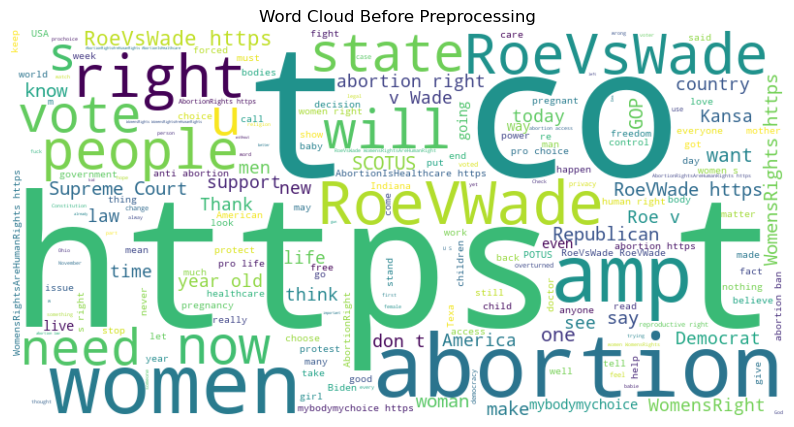

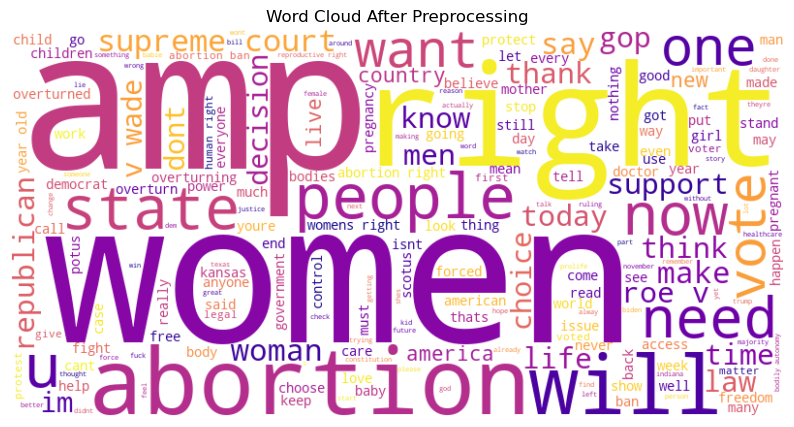

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_word_cloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the tweet data

# Before preprocessing (using original tweet text)
tweet_text_before_preprocessing = ' '.join(df['text'].dropna())
generate_word_cloud(tweet_text_before_preprocessing, 'Word Cloud Before Preprocessing', 'viridis')

# After preprocessing (using cleaned tweet text)
tweet_text_after_preprocessing = ' '.join(df['cleaned_text'].dropna())
generate_word_cloud(tweet_text_after_preprocessing, 'Word Cloud After Preprocessing', 'plasma')
